In [3]:
!pip install tensorflow

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [31]:
data_dir = 'Desktop/UNADFG/09/Proyecto de grado/Fase 4/Dataset_hojas_de_papa/archive/PotatoPlants'  
datagen = ImageDataGenerator(
    rescale=1.0/255,          
    validation_split=0.2    
)
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [33]:
# Se define el modelo con una capa de entrada
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [35]:
# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Se imprimen las clases detectatadas
print("Clases detectadas:", train_data.class_indices)

Clases detectadas: {'Papa_Saludable': 0, 'Patata_Tizón_temprano': 1, 'patata Tizón tardío': 2}


In [23]:
# Se realiza el entrenamiento del modelo
history = model.fit(
    train_data,                
    validation_data=val_data, 
    epochs=10
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 664ms/step - accuracy: 0.9700 - loss: 0.0852 - val_accuracy: 0.9558 - val_loss: 0.1153
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 667ms/step - accuracy: 0.9736 - loss: 0.0654 - val_accuracy: 0.9581 - val_loss: 0.1040
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 669ms/step - accuracy: 0.9756 - loss: 0.0596 - val_accuracy: 0.9814 - val_loss: 0.0755
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 674ms/step - accuracy: 0.9899 - loss: 0.0286 - val_accuracy: 0.9698 - val_loss: 0.0922
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 677ms/step - accuracy: 0.9849 - loss: 0.0445 - val_accuracy: 0.9349 - val_loss: 0.1696
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 674ms/step - accuracy: 0.9515 - loss: 0.1317 - val_accuracy: 0.9767 - val_loss: 0.0776
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 672ms/step - accuracy: 0.9850 - loss: 0.0431 - val_accuracy: 0.9512 - val_loss: 0.1234
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 671ms/step - accuracy: 0.9854 - loss: 0.0500 - val_accu

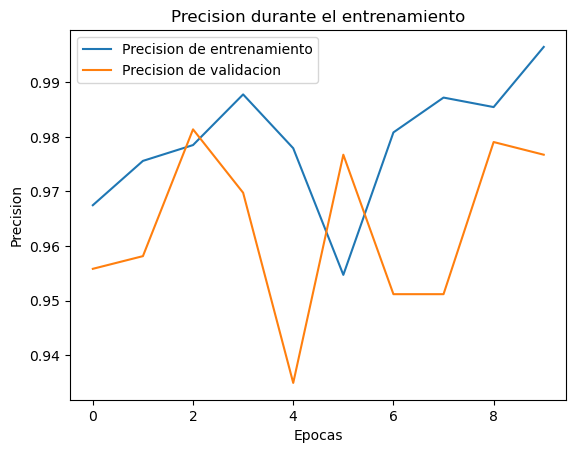

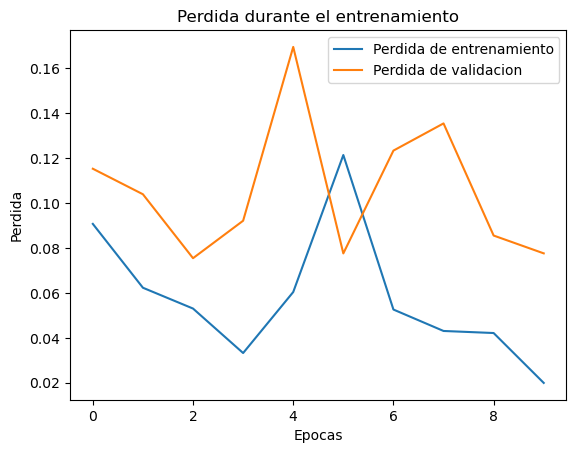

In [39]:
# Se grafica la precision y la perdida de entrenamiento
plt.plot(history.history['accuracy'], label='Precision de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision de validacion')
plt.title('Precision durante el entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Perdida de entrenamiento
plt.plot(history.history['loss'], label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de validacion')
plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [27]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Precisión en validación: {val_accuracy*100:.2f}%")
print(f"Pérdida en validación: {val_loss:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9774 - loss: 0.0625
Precisión en validación: 97.67%
Pérdida en validación: 0.08


In [49]:
# Se carga la imagen de la planta a predecir
img_path = 'Desktop/UNADFG/09/Proyecto de grado/Fase 4/como-prevenir__controlar-y-eliminar-el-tizón_tardío-de-la-papa-1200.jpg'  
img = image.load_img(img_path, target_size=(224, 224)) 
img_array = image.img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)

In [51]:
# Aplicamos la prediccion con el modelo
pred = model.predict(img_array)
class_names = ['Papa_Saludable', 'Patata_Tizón_Tardío', 'Patata_Tizón_Temprano']  
predicted_class = class_names[np.argmax(pred)]
print(f"La imagen pertenece a la categoría: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
La imagen pertenece a la categoría: Patata_Tizón_Tardío


In [53]:
# Guardamnos el modelo
model.save('modelo_entrenado.keras')